# Assignment 02 – Generative and Non-Generative Methods

#### Group 5 - Kaiyue Wei - kw823
#### Group 5 - Xulu Wang - xw370
#### Group 5 - Your FirstName LastName - GUID
#### Group 5 - Yanyan Li - yl1494

# Initialization 

## Load the dataset. (0.5 x 2)

In [1]:
import urllib.request
url_g05 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'
filename_g05 = 'datasets/online_shoppers_intention.csv'
urllib.request.urlretrieve(url_g05, filename_g05)

('datasets/online_shoppers_intention.csv',
 <http.client.HTTPMessage at 0x21e32359160>)

## Show first 6 data points using head(). (0.5 x 2)

In [2]:
import pandas as pd
filename_g05 = 'datasets/online_shoppers_intention.csv'
OSI_g05 = pd.read_csv(filename_g05, header=0)
OSI_g05["Weekend"] = OSI_g05["Weekend"].astype(int)
OSI_g05["Revenue"] = OSI_g05["Revenue"].astype(int)

month_dict_g05 = {"Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, "June":6, "Jul":7, "Aug":8, "Sep":9, "Oc t":10, "Nov":11, "Dec":12}
OSI_g05["Month"] = OSI_g05["Month"].map(month_dict_g05)

OSI_g05.insert(loc=16, column="VisitorTypeNumeric", value=pd.factorize(OSI_g05['VisitorType'])[0] + 1)
OSI_g05 = OSI_g05.drop('VisitorType', 1)

OSI_g05.head(6)

C:\Users\wxl\AppData\Local\Temp\ipykernel_23424\97515888.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  OSI_g05 = OSI_g05.drop('VisitorType', 1)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorTypeNumeric,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2.0,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2.0,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2.0,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2.0,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2.0,3,3,1,4,1,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2.0,2,2,1,3,1,0,0


## Describe the Dataframe by using describe. (0.5 x 2) 

In [3]:
OSI_g05.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorTypeNumeric,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,11781.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.542569,2.124006,2.357097,3.147364,4.069586,1.151176,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.432046,0.911325,1.717277,2.401591,4.025169,0.376989,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,1.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,3.000000,1.000000,1.000000


## Show correlation heat plot of the entire dataset using matplotlib and sns, choose any color pallet (except blue) you like (experiment). (0.5 x 2) 

Text(0.5, 1.0, 'Heat Map of Online Shoppers Intention Dataset')

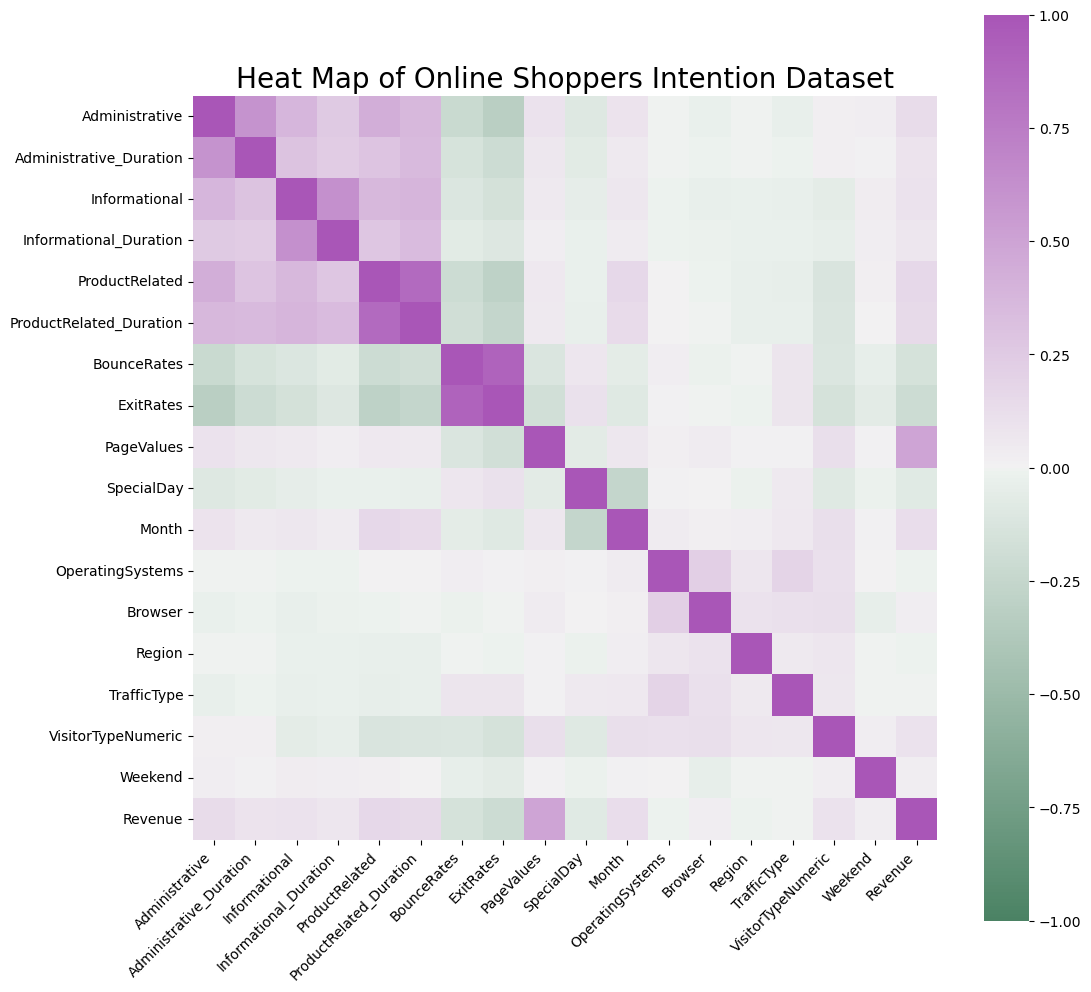

In [4]:
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 12,12
rcParams['figure.dpi'] = 100
corr_OSI_g05 = OSI_g05.corr()
ax_OSI_g05 = sns.heatmap(
    corr_OSI_g05, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
    square=True
)
ax_OSI_g05.set_xticklabels(
    ax_OSI_g05.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax_OSI_g05.set_title(
    "Heat Map of Online Shoppers Intention Dataset",
    fontdict={"size":20}
)

## Show the distribution plots of each variable using hist function from pandas+matplotlib. Also, experiment with visual aspects of the image (not a lot, but an excellent visual will always leave a better impression. you can change color, thickness, font, font size, font color, etc.). Explain the plot distributions as much as you can. For example, you can describe the attributes of the distributions like *“From the distribution plot of variable x we can see that the mean is xx with std dev of yy and the variable seems to be skewed towards left.”* (0.5 x 2) 


array([[<AxesSubplot:title={'center':'Administrative'}>,
        <AxesSubplot:title={'center':'Administrative_Duration'}>,
        <AxesSubplot:title={'center':'Informational'}>,
        <AxesSubplot:title={'center':'Informational_Duration'}>],
       [<AxesSubplot:title={'center':'ProductRelated'}>,
        <AxesSubplot:title={'center':'ProductRelated_Duration'}>,
        <AxesSubplot:title={'center':'BounceRates'}>,
        <AxesSubplot:title={'center':'ExitRates'}>],
       [<AxesSubplot:title={'center':'PageValues'}>,
        <AxesSubplot:title={'center':'SpecialDay'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'OperatingSystems'}>],
       [<AxesSubplot:title={'center':'Browser'}>,
        <AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'TrafficType'}>,
        <AxesSubplot:title={'center':'VisitorTypeNumeric'}>],
       [<AxesSubplot:title={'center':'Weekend'}>,
        <AxesSubplot:title={'center':'Revenue'

<Figure size 1800x1800 with 0 Axes>

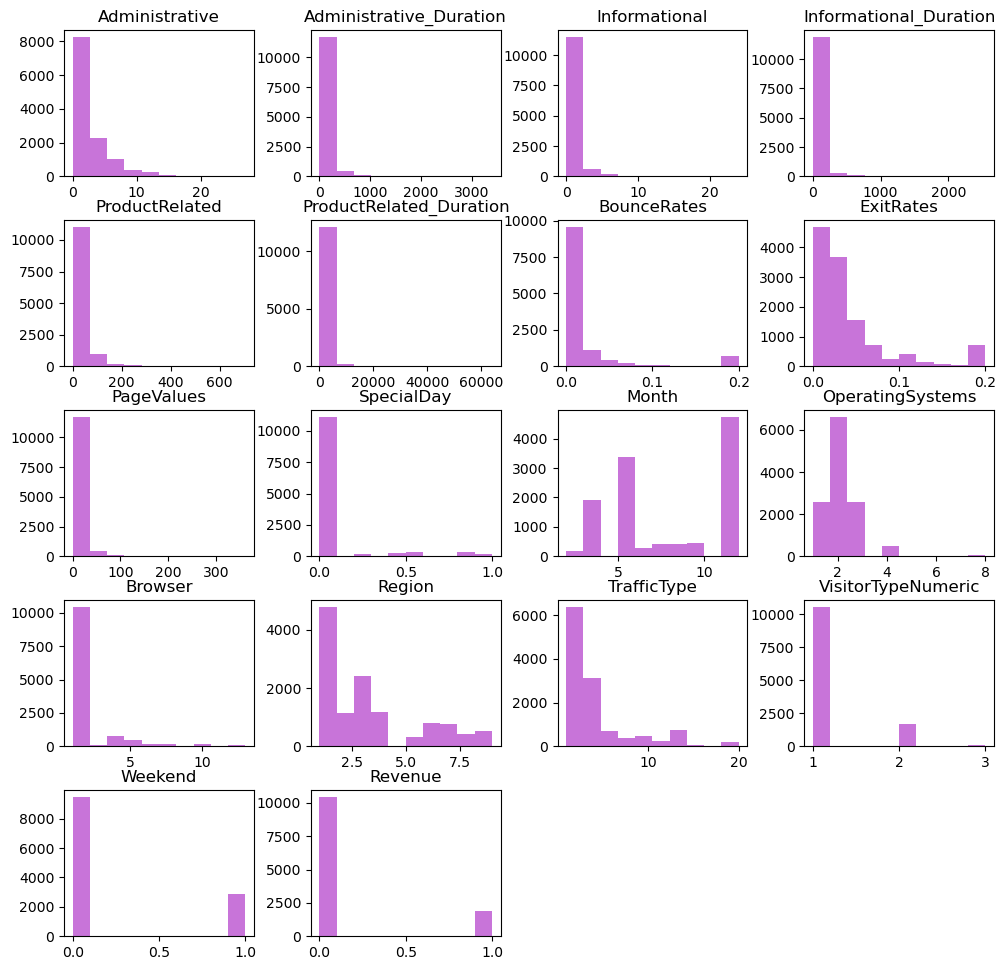

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12),dpi=150)
OSI_g05.hist(color='#C874D9', grid=False)

In [6]:
print("Unique values of Revenue variable: ", OSI_g05['Revenue'].unique())
print("Unique values of Special_Day variable: ", sorted(OSI_g05['SpecialDay'].unique()))
print("Unique values of Browser variable: ", sorted(OSI_g05['Browser'].unique()))
print("Unique values of TrafficType variable: ", sorted(OSI_g05['TrafficType'].unique()))

Unique values of Revenue variable:  [0 1]
Unique values of Special_Day variable:  [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
Unique values of Browser variable:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Unique values of TrafficType variable:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


***Numerical:***

Administrative
- The distribution plot of variable Administrative shows that the mean is around 2.3 with a standard deviation of around 3.3. The distribution is skewed towards the right, which means that there are more values on the right side of the distribution than on the left side.

Administrative Duration & Informational & Informational Duration & ProductRelated & ProductRelated Duration & Page Values
- The distribution plot of these variables have very similar distribution. Their distributions are skewed towards the right with a sharp peak at the minimum value, most of their values are on the right side.
- `Administrative Duration` variable has the mean around 80.82 with a standard deviation around 176.78.
- `Informational` variable has the mean around 0.5 with a standard deviation around 1.27.
- `Informational Duration` variable has the mean around 34.47 with a standard deviation around 140.75.
- `ProductRelated` variable has the mean around 31.73 with a standard deviation around 44.48.
- `ProductRelated Duration` variable has the mean around 1194.75 with a standard deviation around 1913.67.
- `Page Values` variable has the mean around 5.89 with a standard deviation around 18.57.

BounceRates & ExitRates
- The distribution plot of these variables have similar distribution. Their distributions are skewed towards the right, which means that there are more values on the right side of the distribution with small values in the other bins and a slightly higher value in the last right bin.
- `BounceRates` variable has the mean around 0.02 with a standard deviation around 0.05.
- `ExitRates` variable has the mean around 0.04 with a standard deviation around 0.05.


***Categorical:***

Special Day
- From the distribution plot of Special Day, the most common value is 0. Very few data points in the other categories.

Operating Systems
- From the distribution plot of Operating Systems, the most common value is 2, followed by 1 and 3. Very few data points in the other categories.

Browser
- From the distribution plot of Browser, the most common value is 1. Very few data points in the other categories.

Region
- From the distribution plot of Region, the most common value is 1, followed by 3 and then 2 & 4. Some data points in the other categories.

Traffic Type
- From the distribution plot of Traffic Type, the distribution is skewed towards the right. The most common value is 1, followed by 2. Few data points in the other categories.

Visitor Type Numeric
- From the distribution plot of Visitor Type Numeric, the most common value is 1, followed by 2 and then 3.

Weekend
- Weekend varible is binary category. From its distribution plot, the most common value is 0.

Revenue
- Revenue varible is binary category. From its distribution plot, the most common value is 0.

## Load the dataset. (0.5 x 2)

In [7]:
import pandas as pd
filename_BSH_g05 = 'datasets/Bike-Sharing-Hour.csv'
BSH_g05 = pd.read_csv(filename_BSH_g05, header=0)

## Show first 6 data points using head(). (0.5 x 2)

In [8]:
import pandas as pd
BSH_g05.head(6)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


## Describe the Dataframe by using describe. (0.5 x 2) 

In [9]:
BSH_g05.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Show correlation heat plot of the entire dataset using matplotlib and sns, choose any color pallet (except blue) you like (experiment). (0.5 x 2) 

Text(0.5, 1.0, 'Heat Map of Bike Sharing Hourly Dataset')

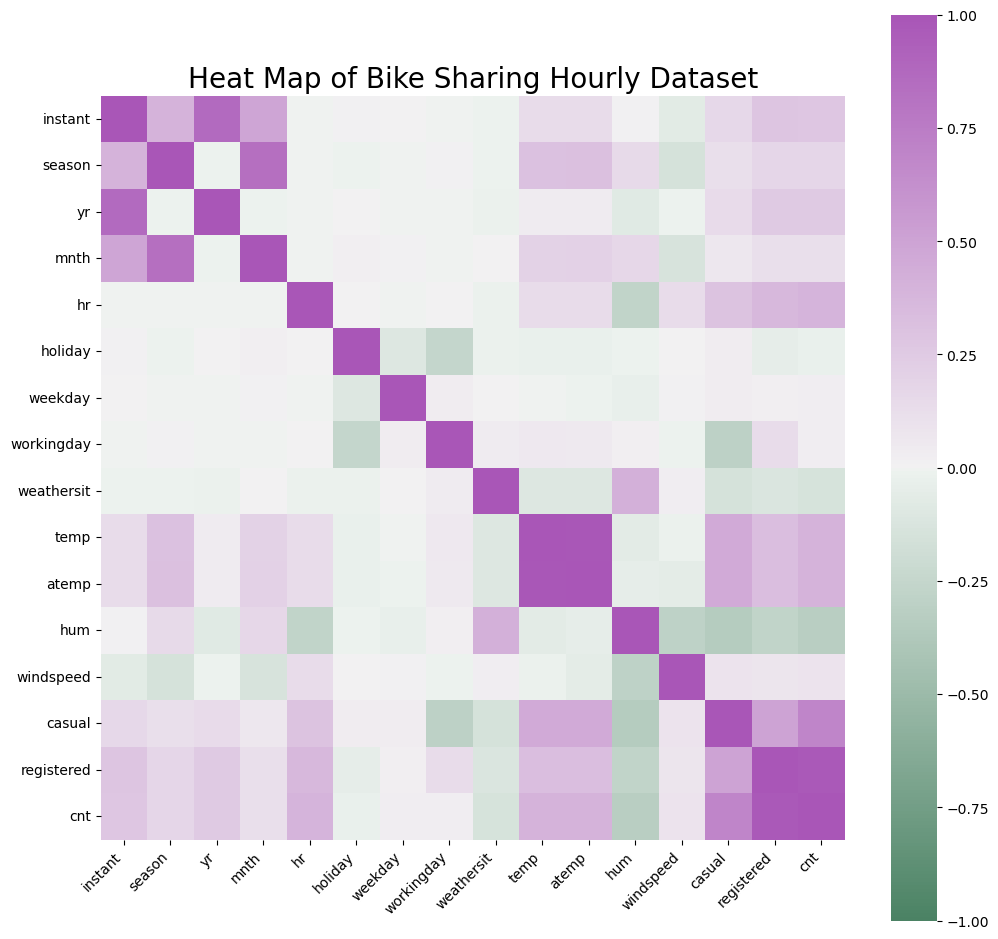

In [10]:
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 12,12
rcParams['figure.dpi'] = 100
corr_BSH_g05 = BSH_g05.corr()
ax_BSH_g05 = sns.heatmap(
    corr_BSH_g05, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
    square=True
)
ax_BSH_g05.set_xticklabels(
    ax_BSH_g05.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax_BSH_g05.set_title(
    "Heat Map of Bike Sharing Hourly Dataset",
    fontdict={"size":20}
)

## Show the distribution plots of each variable using hist function from pandas+matplotlib. Also, experiment with visual aspects of the image (not a lot, but an excellent visual will always leave a better impression. you can change color, thickness, font, font size, font color, etc.). Explain the plot distributions as much as you can. For example, you can describe the attributes of the distributions like *“From the distribution plot of variable x we can see that the mean is xx with std dev of yy and the variable seems to be skewed towards left.”* (0.5 x 2) 


array([[<AxesSubplot:title={'center':'instant'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'yr'}>,
        <AxesSubplot:title={'center':'mnth'}>],
       [<AxesSubplot:title={'center':'hr'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'weekday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weathersit'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'hum'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'cnt'}>]], dtype=object)

<Figure size 1800x1800 with 0 Axes>

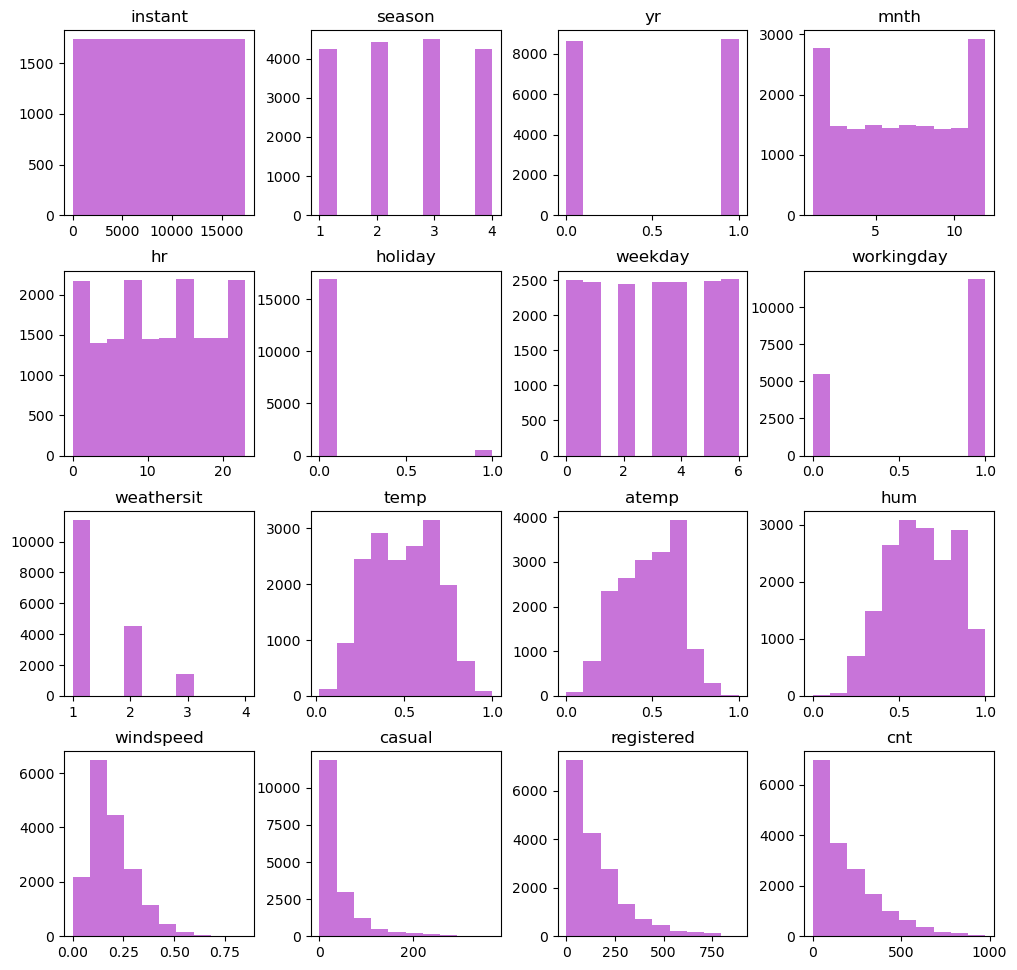

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12),dpi=150)
BSH_g05.hist(color='#C874D9', grid=False)

__*Numerical:*__

hr:
- More data is collected during the time periods 9pm to 2am, 7am to 9am and 2pm to 4pm. The rest of the hours have roughly equal numbers of records.

temp (normalized temperature in Celsius):
- The majority of records take place when the temp is between 0.3 (6.1 &deg;C) and 0.8 (29.6 &deg;C), but its distribution is slightly different from the normal distribution, because there are two peaks at about 0.4 and 0.7, corresponding to roughly 11 &deg;C and 25 &deg;C.
- Its standard deviation is about 1 &deg;C

atemp:
- The number of records for the feeling temperature ranging from 0.3 (6.1 &deg;C) to 0.7 (24.9 &deg;C) gradually increase, constituting the majority of all records.

hum:
- The distribution of normalized humidity generally conforms to the normal distribution with a mean of 0.627 and a standard deviation of 0.193, except when the normalized humidity is around 0.8.

windspeed:
- The distribution of normalized windspeed is right-skewed, with a mean of 0.19 and a standard deviation of 0.12. However, the mode occurs within the range of 0.085 to 0.17.

casual & registered & cnt:

- These three variables exhibit a similar distribution, which aligns with their intended meaning, representing the number of users on a given day. Based on the histograms, the highest number of records is found in the bin with the lowest count value. As the number of users increases, the number of records decreases rapidly.

__*Categorical:*__

season ((1:winter, 2:spring, 3:summer, 4:fall)):

- The number of records from different seasons is about equal, but slightly more data come from the summer.

yr:

- The number of records from 2011 (0) and 2012 (1) is about equal.

mnth:

- The number of records from different weekdays is about equal.

holiday:

- Data from non-holiday days dominates.

weekday (day of the week):

- The number of records from different weekdays is about equal.

workingday (if day is neither weekend nor holiday is 1, otherwise is 0.):

- The numder of records from workingdays is more than twice that of non-workingdays.

weathersit:
> - 1 - Clear, Few clouds, Partly cloudy, Partly cloudy
> - 2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
> - 3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
> - 4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- Data from category 1 make up the majority. Catergory 2 and 3 follow behind. Few data come from the 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog' days.

# Intermediate Steps (Essential, no points granted)

In [12]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

OSI_g05.dropna(inplace=True)
X_OSI_g05 = OSI_g05.loc[:, OSI_g05.columns != 'Revenue'].to_numpy()
y_OSI_g05 = OSI_g05.iloc[:,-1:].to_numpy()

# print(X_OSI_g05)
# print(y_OSI_g05)

OSIX_train_g05, OSIX_test_g05, OSIy_train_g05, OSIy_test_g05 = train_test_split(X_OSI_g05, y_OSI_g05, test_size=0.30, random_state=3316)

In [13]:
# X_BSH_g05 = BSH_g05.loc[:, BSH_g05.columns != 'cnt'].to_numpy()
X_BSH_g05 = BSH_g05.loc[:, (BSH_g05.columns != 'cnt') & (BSH_g05.columns != 'dteday')].to_numpy()
y_BSH_g05 = BSH_g05.iloc[:,-1:].to_numpy()

# print(X_BSH_g05)
# print(y_BSH_g05)

BSHX_train_g05, BSHX_test_g05, BSHy_train_g05, BSHy_test_g05 = train_test_split(X_BSH_g05, y_BSH_g05, test_size=0.30, random_state=3316)

# Classification (total 48)
## AdaBoost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

In [14]:
from sklearn.ensemble import AdaBoostClassifier

Import the AdaBoost Classifier Algorithm from the sklearn package(class) under the ensemble method/category.

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

In [15]:
OSI_clf_ada_g05 = AdaBoostClassifier(n_estimators=100, random_state=3316)

For the AdaBoostClassifier, we do not specify the base learner, so it will use the default decision tree algorithm. 

`n_estimators`, which is the number of base estimators, sets to 100, so that 100 decision trees will be used to build the ensemble adaboost.

`random_state` sets to 3316 which represent the GUID of one of the group members in order to ensure to get the same result with same random state number.

### Train classifier on train data and explain what you did. (1.5) 

In [16]:
OSI_ada_fit_g05 = OSI_clf_ada_g05.fit(OSIX_train_g05, OSIy_train_g05.ravel())

`OSI_clf_ada_g05` classifier will be used to train the ada boosting model with input variables training x `OSIX_train_g05`, on target label training y `OSIy_train_g05`.
- `ravel()` used to convert a 2D array into a 1D array

`OSI_ada_fit_g05` used to store the trained classifier 

### Test/fit classifier test data and explain what you did. (1.5)

In [17]:
OSIy_pred_g05 = OSI_ada_fit_g05.predict(OSIX_test_g05)

Use the trained AdaBoost classifier `OSI_ada_fit_g05` to make predictions on the test data `OSIX_test_g05`, and store the predicted labels in  `OSIy_pred_g05`.

### Calculate accuracy and explain what you did. (1.5)

In [18]:
OSI_Ada_accuracy_g05 = accuracy_score(y_true=OSIy_test_g05, y_pred=OSIy_pred_g05)
print("AdaBoosting Classifier Accuracy: {:.2%}".format(OSI_Ada_accuracy_g05))

AdaBoosting Classifier Accuracy: 89.22%


Calculate the accuracy of the classifier's predictionswith `accuracy_score` function.

`OSIy_test_g05` y labels testing data as the `y_true` and compared with `OSIy_pred_g05` y labels predicted on testing features x from the previous step.

`OSI_Ada_accuracy_g05` stores the accuracy score calculated, and then print the result.

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3020
           1       0.65      0.57      0.60       515

    accuracy                           0.89      3535
   macro avg       0.79      0.76      0.77      3535
weighted avg       0.89      0.89      0.89      3535



<Figure size 187.5x187.5 with 0 Axes>

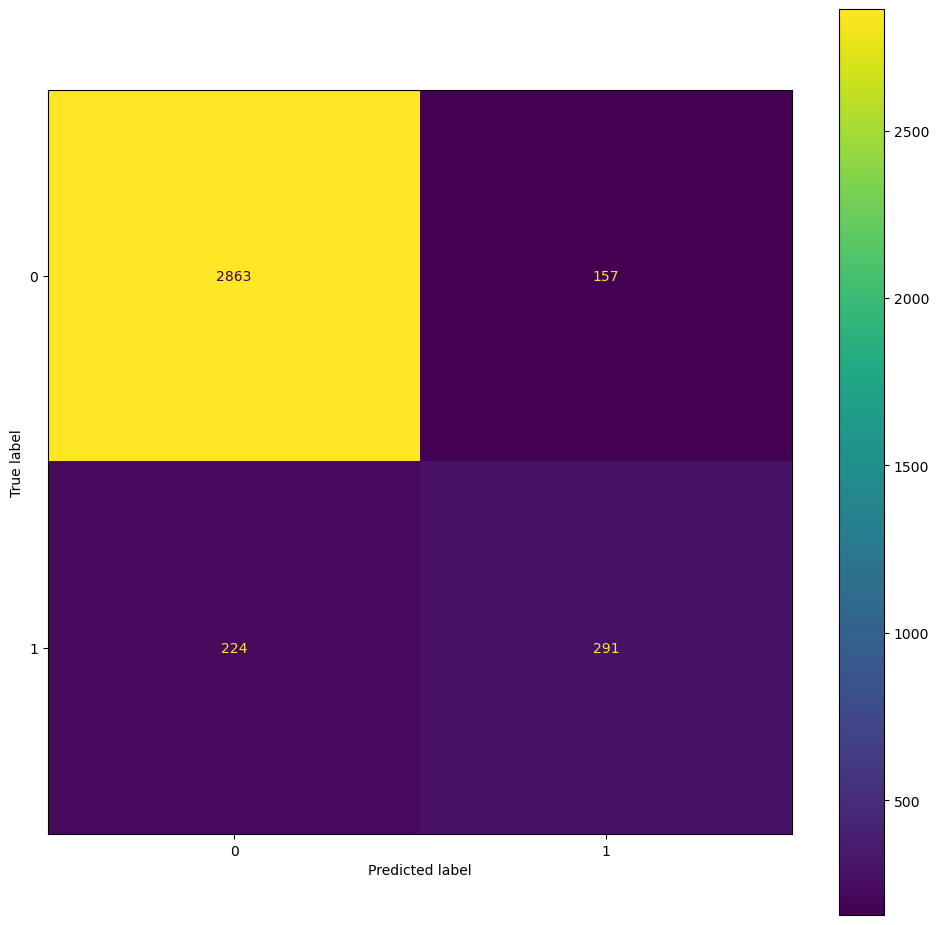

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
from seaborn import set_palette

plt.figure(figsize=(2.5,2.5),dpi=75)
set_palette("Paired")
OSI_conf_matrix_g05 = confusion_matrix(OSIy_test_g05, OSIy_pred_g05)
ConfusionMatrixDisplay.from_estimator(OSI_ada_fit_g05, OSIX_test_g05, OSIy_test_g05)
print(classification_report(OSIy_test_g05, OSIy_pred_g05))

Get confusion matrix based on actual testing data y label `OSIy_test_g05`, and predcted y label from x feature testing data `OSIy_pred_g05` and store in `OSI_conf_matrix_g05`.

Use `ConfusionMatrixDisplay` to visualize the confusion matrix.

Print the classification report with `OSIy_test_g05` and `OSIy_pred_g05`, whcih provides precision, recall, F1-score, and support for each class.


**The result:**

The overall accuracy is 89.22%.

The model correctly predicted the negative class (label 0) very well with 2,863 data points correctly classified as negative, and it has a relatively small number of false positives (157 data points). 

This model has some ability to recognize positive instances. It correctly predicted the positive class (label 1) for 291 data points, but it has 224 false negatives. 

It also shows that most of the data points are labeled as 0. The dataset is imbalanced, which can impact the model's performance.

### Repeat the same with a different parameter set and compare the result with (2)


AdaBoosting Classifier Accuracy: 89.42%
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3020
           1       0.66      0.58      0.61       515

    accuracy                           0.89      3535
   macro avg       0.79      0.76      0.78      3535
weighted avg       0.89      0.89      0.89      3535



<Figure size 187.5x187.5 with 0 Axes>

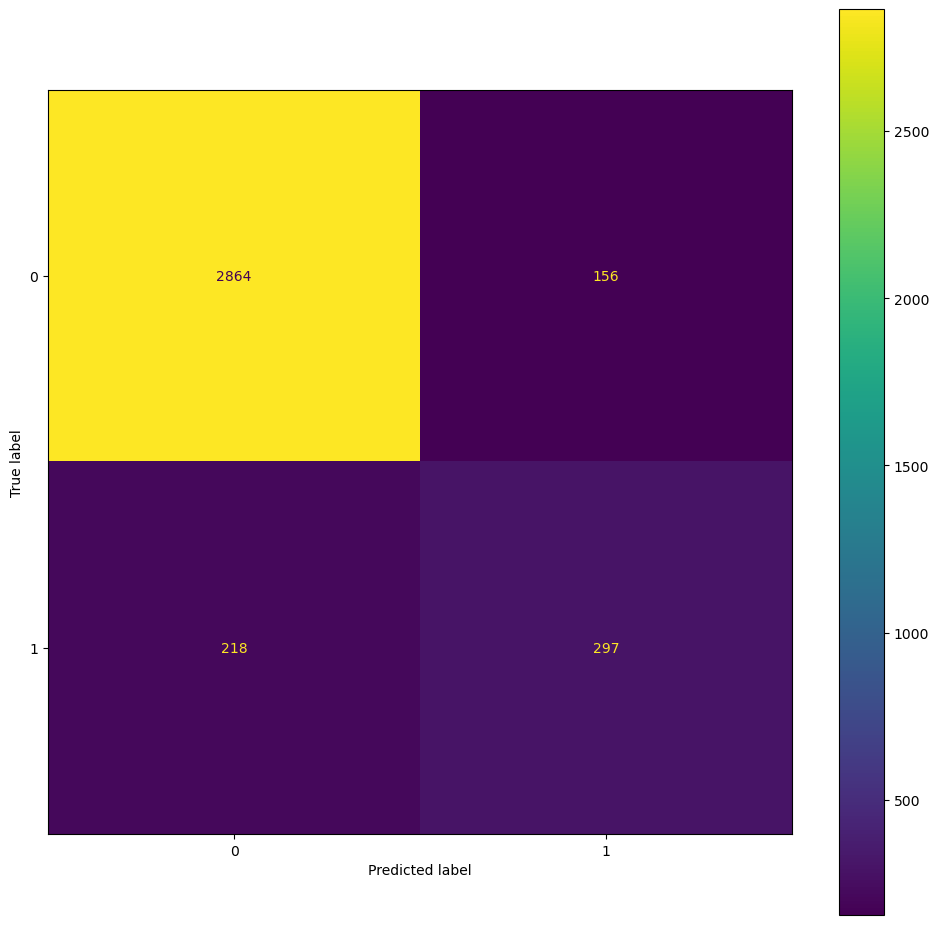

In [20]:
clf_ada_500_g05 = AdaBoostClassifier(n_estimators=500, random_state=3316)

ada_fit_g05 = clf_ada_500_g05.fit(OSIX_train_g05, OSIy_train_g05.ravel())
OSIy_pred_500_g05 = ada_fit_g05.predict(OSIX_test_g05)

Ada_accuracy_g05 = accuracy_score(y_true=OSIy_test_g05, y_pred=OSIy_pred_500_g05)
print("AdaBoosting Classifier Accuracy: {:.2%}".format(Ada_accuracy_g05))
print(classification_report(OSIy_test_g05, OSIy_pred_500_g05))

plt.figure(figsize=(2.5,2.5),dpi=75)
set_palette("Paired")

conf_matrix_g05 = confusion_matrix(OSIy_test_g05, OSIy_pred_500_g05)
ConfusionMatrixDisplay.from_estimator(ada_fit_g05, OSIX_test_g05, OSIy_test_g05)

The Ada boosting model with 500 number of estimators performs better with a higher accuracy 89.42% than 100 number of estimators with the accuracy of 89.22%.

As the number of estimators increase from 100 to 500, the predictions on both true positive and negative do not change much.

## Gradient Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

In [21]:
from sklearn.ensemble import GradientBoostingClassifier 

Import the GradientBoostingClassifier class from ensemble module of sklearn library.

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

In [22]:
OSI_clf_gb_g05 = GradientBoostingClassifier(n_estimators=100, random_state=3316)

What the syntax above does is initializing the gradient boosting classifier. Here are two parameters that are choosen for initialization.
- `n_estimators` specifies the number of boosting stages to perform. It's set to 100 here, meaning that 100 boosting iterations should be processed.
- `random_state` is set to 3316 which represents the GUID of one of the group members in order to control the random permutation of the features at each split and control the random splitting of the training data to ensure that we can get the same result with same random state number.

### Train classifier on train data and explain what you did. (1.5) 

In [23]:
OSI_gb_fit_g05 = OSI_clf_gb_g05.fit(OSIX_train_g05, OSIy_train_g05.ravel())

Feed training dataset to the classifier to train the initialized model.

### Test/fit classifier test data and explain what you did. (1.5)

In [24]:
OSIy_pred_g05 = OSI_gb_fit_g05.predict(OSIX_test_g05)

Based on the trained/fitted model, here is making predictions for the test predictors.

### Calculate accuracy and explain what you did. (1.5)

In [25]:
OSI_gb_accuracy_g05 = accuracy_score(y_true=OSIy_test_g05, y_pred=OSIy_pred_g05)
print("GradientBoost Classifier Accuracy: {:.2%}".format(OSI_gb_accuracy_g05))

GradientBoost Classifier Accuracy: 91.00%


Taking `y_true` and `y_pred` as parameters, `accuracy_score` is used to measure the proportion of correctly predicted labels or classes by a classification model. Then we get the accuracy of Gradient Boosting model at 91%.

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3020
           1       0.72      0.62      0.67       515

    accuracy                           0.91      3535
   macro avg       0.83      0.79      0.81      3535
weighted avg       0.91      0.91      0.91      3535



<Figure size 150x150 with 0 Axes>

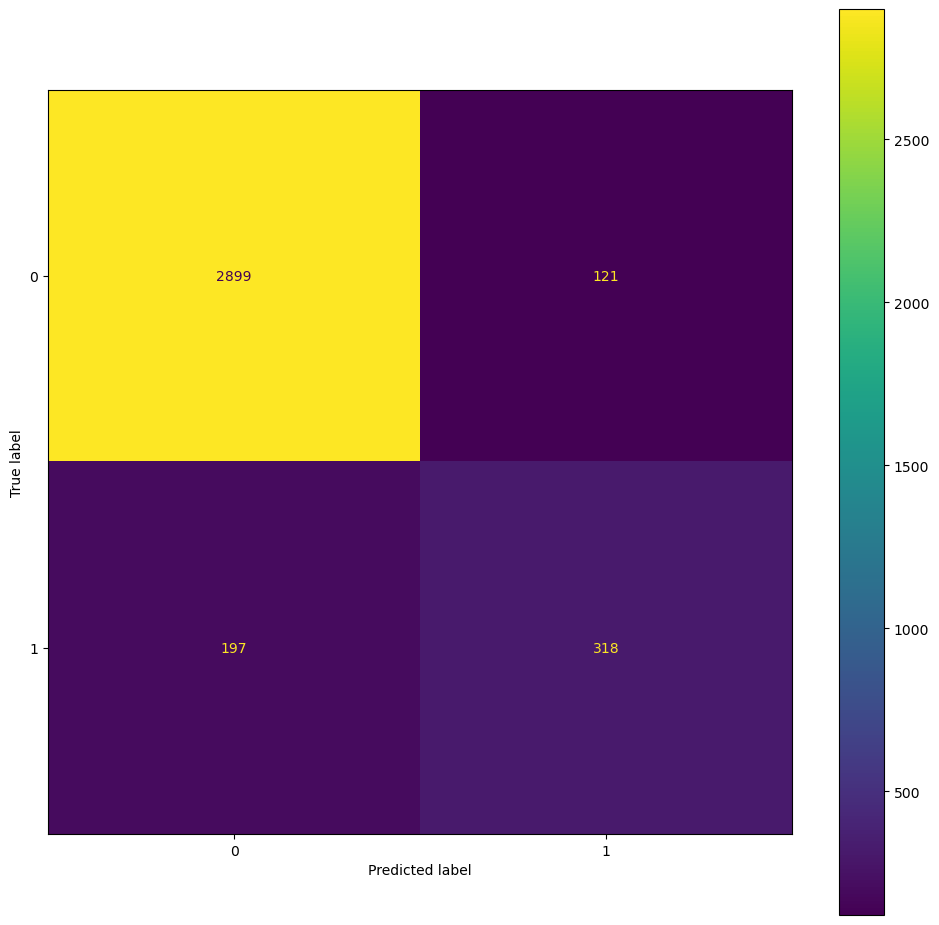

In [26]:
plt.figure(figsize=(2,2),dpi=75)
set_palette("Paired")
OSI_gb_conf_matrix_g05 = confusion_matrix(OSIy_test_g05, OSIy_pred_g05)
ConfusionMatrixDisplay.from_estimator(OSI_gb_fit_g05, OSIX_test_g05, OSIy_test_g05)
print(classification_report(OSIy_test_g05, OSIy_pred_g05))

The overall accuracy of the gradient boosting classifier is decent. It's especially good at making predictions for lable 0. However, for label 1, both precision and recall are relatively low. Low precision means that a relatively small proportion of the positive predictions made by the classifier for that label were correct, and low recall means that the classifier is failing to capture a significant portion of the actual positive instances for that label. Low precision and recall lead to higher false positive and false negtive respectively.

### Repeat the same with a different parameter set and compare the result with (2)


GradientBoost Classifier Accuracy: 90.38%
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3020
           1       0.69      0.61      0.65       515

    accuracy                           0.90      3535
   macro avg       0.81      0.78      0.80      3535
weighted avg       0.90      0.90      0.90      3535



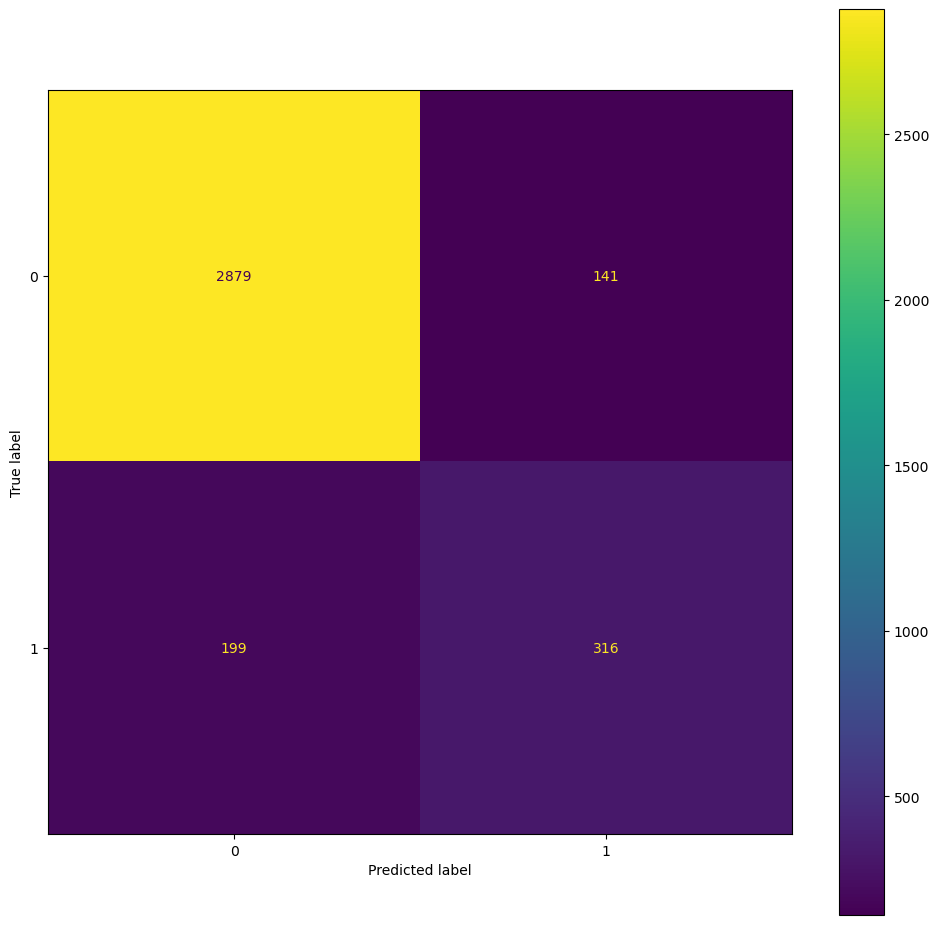

In [27]:
# Initialize classifier
OSI_clf_gb_g05 = GradientBoostingClassifier(n_estimators=500, random_state=3316)
# Train the model using training data
OSI_gb_fit_g05 = OSI_clf_gb_g05.fit(OSIX_train_g05, OSIy_train_g05.ravel())
# Make predictions for X_test
OSIy_pred_g05 = OSI_gb_fit_g05.predict(OSIX_test_g05)
# Accuracy
OSI_gb_accuracy_g05 = accuracy_score(y_true=OSIy_test_g05, y_pred=OSIy_pred_g05)
print("GradientBoost Classifier Accuracy: {:.2%}".format(OSI_gb_accuracy_g05))
# Plot confusion matrix
OSI_gb_conf_matrix_g05 = confusion_matrix(OSIy_test_g05, OSIy_pred_g05)
ConfusionMatrixDisplay.from_estimator(OSI_gb_fit_g05, OSIX_test_g05, OSIy_test_g05)
print(classification_report(OSIy_test_g05, OSIy_pred_g05))

After changing the number of boosting iterations (`n_estimators`) to 500, the accuracy of this model slightly decreases to 90.38% from 91%, which may indicate the beginning of overfitting.

## XG Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

In [28]:
from xgboost import XGBClassifier

Import the XGBClassifier class from xgboost library.

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

In [29]:
OSI_clf_xgb_g05 = XGBClassifier(n_estimators=100, random_state=3316)

What the syntax above does is initializing the XGBoost classifier. Here are two parameters that are choosen for initialization.
- `n_estimators` specifies the number of gradient boosted trees, which is equivalent to number of boosting rounds. It's set to 100 here, meaning that 100 boosting iterations should be processed.
- `random_state` is set to 3316 which represents the GUID of one of the group members in order to control the random permutation of the features at each split and control the random splitting of the training data to ensure that we can get the same result with same random state number.

### Train classifier on train data and explain what you did. (1.5) 

In [30]:
OSI_xgb_fit_g05 = OSI_clf_xgb_g05.fit(OSIX_train_g05, OSIy_train_g05.ravel())

Feed training dataset to the classifier to train the initialized model.

### Test/fit classifier test data and explain what you did. (1.5)

In [31]:
OSIy_pred_g05 = OSI_xgb_fit_g05.predict(OSIX_test_g05)

Based on the trained/fitted model, here is making predictions for the test predictors.

### Calculate accuracy and explain what you did. (1.5)

In [32]:
OSI_xgb_accuracy_g05 = accuracy_score(y_true=OSIy_test_g05, y_pred=OSIy_pred_g05)
print("XGBoost Classifier Accuracy: {:.2%}".format(OSI_xgb_accuracy_g05))

XGBoost Classifier Accuracy: 90.66%


Taking `y_true` and `y_pred` as parameters, `accuracy_score` is used to measure the proportion of correctly predicted labels or classes by a classification model. Then we get the accuracy of XGBoost model at 90.66%.

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


              precision    recall  f1-score   support

           0       0.93      0.96      0.95      3020
           1       0.71      0.60      0.65       515

    accuracy                           0.91      3535
   macro avg       0.82      0.78      0.80      3535
weighted avg       0.90      0.91      0.90      3535



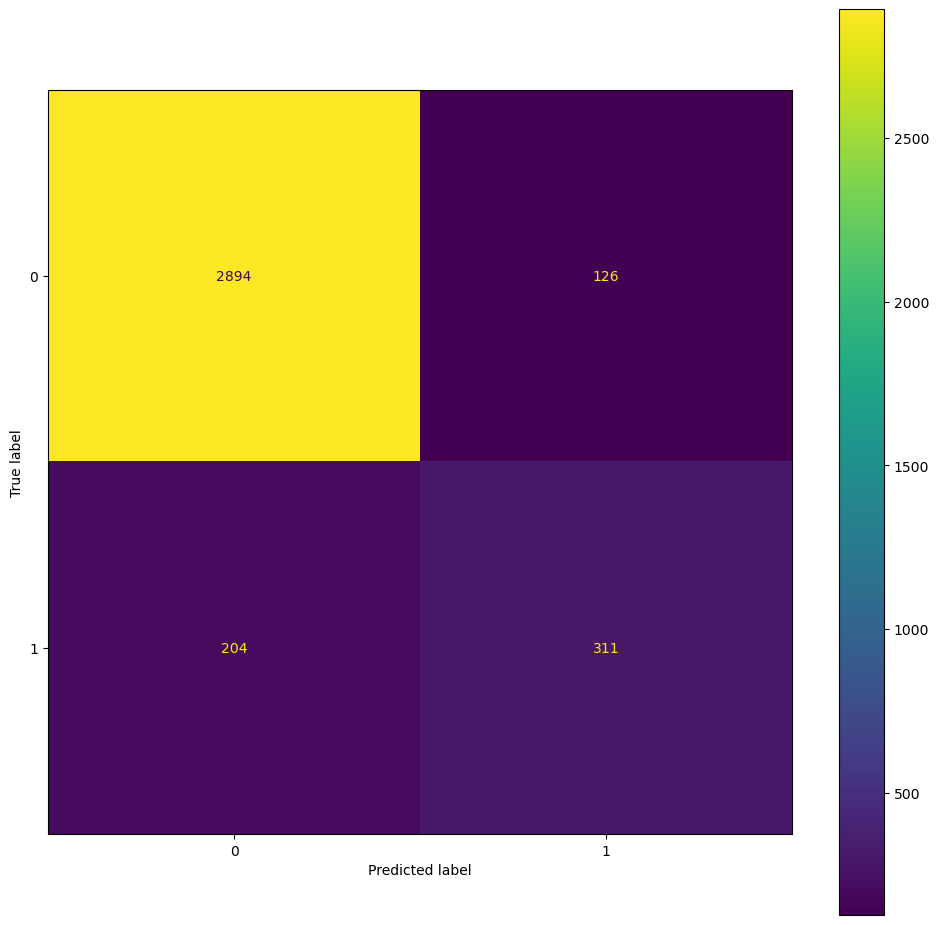

In [33]:
OSI_xgb_conf_matrix_g05 = confusion_matrix(OSIy_test_g05, OSIy_pred_g05)
ConfusionMatrixDisplay.from_estimator(OSI_xgb_fit_g05, OSIX_test_g05, OSIy_test_g05)
print(classification_report(OSIy_test_g05, OSIy_pred_g05))

The accuracy at 90.66% indicates the model is performing well in terms of overall correctness in its predictions. Also, the high precision and recall means the model is minimizing false positives and false negatives as well.

### Repeat the same with a different parameter set and compare the result with (2)


GradientBoost Classifier Accuracy: 90.10%
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3020
           1       0.68      0.60      0.64       515

    accuracy                           0.90      3535
   macro avg       0.81      0.78      0.79      3535
weighted avg       0.90      0.90      0.90      3535



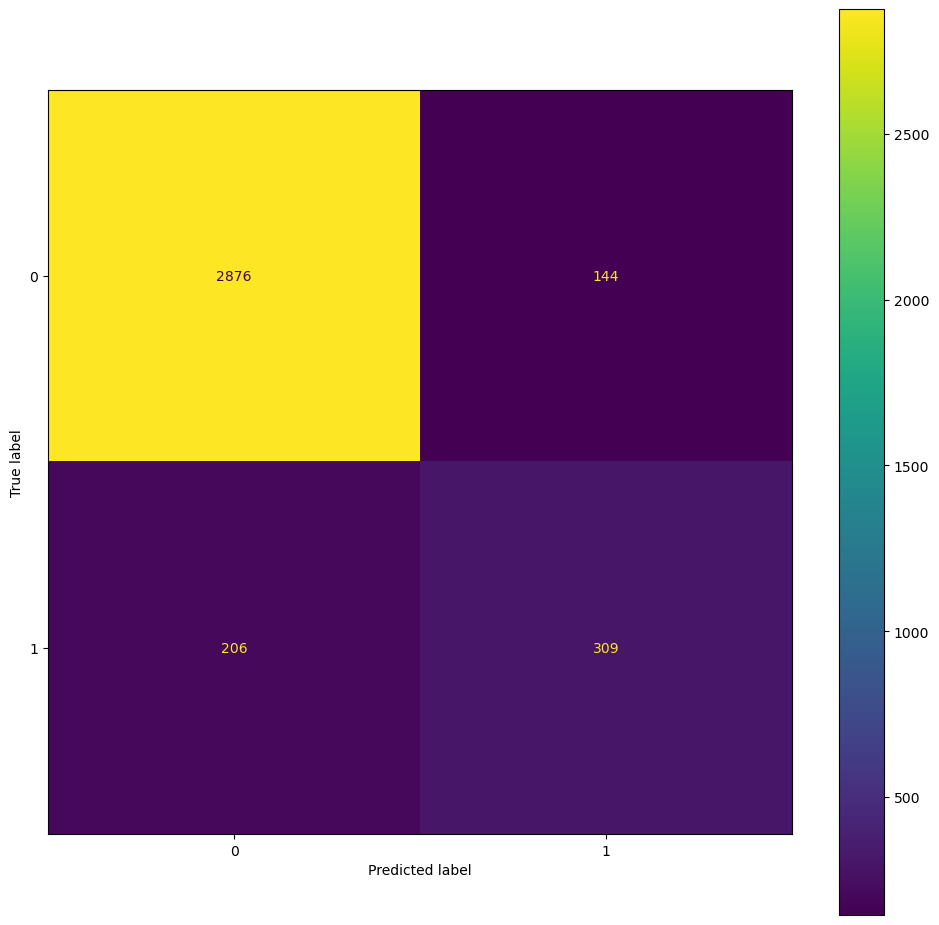

In [34]:
OSI_clf_xgb_g05 = XGBClassifier(n_estimators=500, random_state=3316)
OSI_xgb_fit_g05 = OSI_clf_xgb_g05.fit(OSIX_train_g05, OSIy_train_g05.ravel())
OSIy_pred_g05 = OSI_xgb_fit_g05.predict(OSIX_test_g05)
OSI_xgb_accuracy_g05 = accuracy_score(y_true=OSIy_test_g05, y_pred=OSIy_pred_g05)
print("GradientBoost Classifier Accuracy: {:.2%}".format(OSI_xgb_accuracy_g05))
OSI_xgb_conf_matrix_g05 = confusion_matrix(OSIy_test_g05, OSIy_pred_g05)
ConfusionMatrixDisplay.from_estimator(OSI_xgb_fit_g05, OSIX_test_g05, OSIy_test_g05)
print(classification_report(OSIy_test_g05, OSIy_pred_g05))

While the number of iteration rounds increases, the accuracy experiences a slight decrease, coinciding with a reduction in precision for label 1. This phenomenon may stem from the dominance of label 0, leading the model to place more emphasis on data associated with label 0. Consequently, it becomes more prone to producing predictions of 0.

## Bagging
### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Import the RandomForestClassifier class from scikit-learn, which is an ensemble learning method based on bagging.

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

In [ ]:
OSI_clf_bag_g05 = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)


Create a RandomForestClassifier object with the following parameters:

n_estimators: The number of decision trees in the ensemble setting to 100.
max_depth: The maximum depth of the individual decision trees. Here, I've set it to None, which means the trees will expand until they contain less than min_samples_split samples in each leaf node.
random_state: A random seed for reproducibility.

### Train classifier on train data and explain what you did. (1.5) 

### Test/fit classifier test data and explain what you did. (1.5)

### Calculate accuracy and explain what you did. (1.5)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


# Regression (22 Points)
## Gradient Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

In [189]:
from sklearn.ensemble import GradientBoostingRegressor

### Create the appropriate regressor  and describe what the syntax represents and what parameters you choose (1.5)

In [190]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, loss='squared_error')


n_estimators=100: We're specifying the boosting process to consist of 100 trees. Depending on the problem, this might need to be adjusted.

learning_rate=0.1: This means each tree will contribute 10% of its prediction as a correction to the previous tree's errors.

max_depth=3: The trees will be of a maximum depth of 3, preventing them from becoming too complex and overfitting the data.

random_state=42: Ensures reproducibility of results.

loss='squared_error': This specifies that we're using the least squares regression as the loss function to be minimized.

### Train regressor on train data and explain what you did. (1.5) 

In [191]:
gb_regressor.fit(BSHX_train_g05, BSHy_train_g05)

/Users/yanyanli0/opt/anaconda3/envs/ANLY512/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=42)

By training the regressor on the BSHX_train_g05 and BSHy_train_g05 datasets, we're teaching it to understand the patterns in the bike sharing data. This trained model can then predict the number of bike rentals

### Test/fit regressor test data and explain what you did. (1.5)

In [192]:
# Predict on Test Data
BSHy_pred_g05 = gb_regressor.predict(BSHX_test_g05)

Im making predictions using the Gradient Boost regressor on the test set BSHX_test_g05 and store the predictions in BSHy_pred_g05.

### Calculate MSE,MAE,R^2 and explain what you did. (1.5)

In [193]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


mse = mean_squared_error(BSHy_test_g05, BSHy_pred_g05)
mae = mean_absolute_error(BSHy_test_g05, BSHy_pred_g05)
r2 = r2_score(BSHy_test_g05, BSHy_pred_g05)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 26.135404718947775
Mean Absolute Error (MAE): 3.102257875727917
R^2 Score: 0.9992316768513915


I calcuated the MSE, MAE and R^2 and those stats can tell us how good our model is. R^2 score is approximately 0.9992, which is very close to 1. This indicates that the model explains 99.92% of the variance in the target variable. Such a high R^2 score typically suggests an excellent fit to the data

### Show both text and visual Actual value vs Predicted values using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


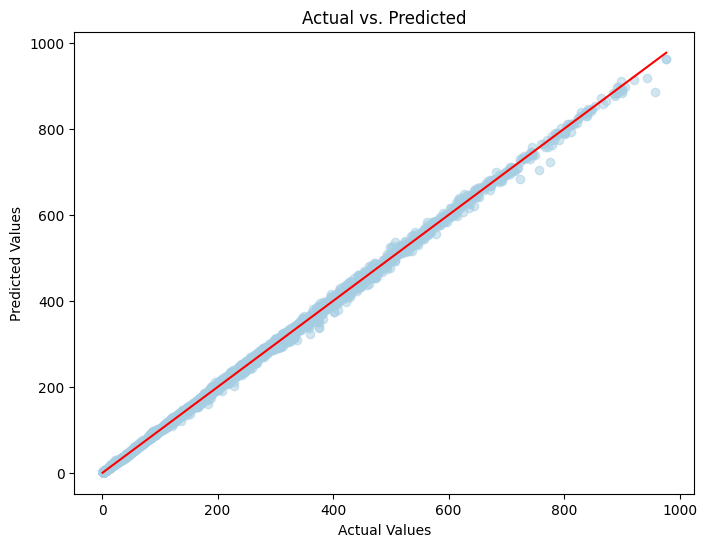

In [194]:
def plot_actual_vs_predicted(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red')  # Diagonal line
    plt.show()

plot_actual_vs_predicted(BSHy_test_g05,BSHy_pred_g05)

In [195]:
import numpy as np
def regression_metrics(y_true, y_pred):
    """
    Calculate common regression metrics.
    
    Parameters:
    - y_true: Actual target values.
    - y_pred: Predicted target values.
    
    Returns:
    - A dictionary containing MAE, MSE, RMSE, and R^2.
    """
    
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R^2': r2
    }

print(regression_metrics(BSHy_test_g05,BSHy_pred_g05))

{'MAE': 3.102257875727917, 'MSE': 26.135404718947775, 'RMSE': 5.112279796621833, 'R^2': 0.9992316768513915}


The scatter plot of actual versus predicted values reveals that most data points lie along a 45-degree line, signifying that the predicted values are in close agreement with the true values. This pattern is further corroborated by a high R^2 value, emphasizing that our model has successfully captured a significant proportion of the variance in the target variable. Such alignment between actual and predicted values, coupled with the high R^2, underscores the robustness and predictive accuracy of our regression model

### Repeat the same with a different parameter set and compare the result with (2)


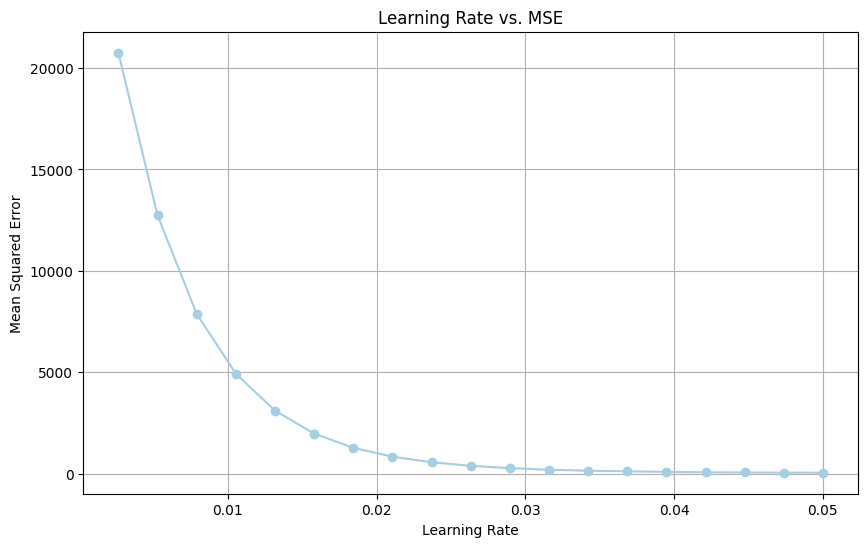

In [196]:
# Define learning rates
learning_rates = np.linspace(0, 0.05, 20)[1:]
mse_values = []
BSHy_train_g05 = BSHy_train_g05.ravel()
BSHy_test_g05 = BSHy_test_g05.ravel()
# Train models for each learning rate & collect MSE
for lr in learning_rates:
    model = GradientBoostingRegressor(learning_rate=lr)
    model.fit(BSHX_train_g05, BSHy_train_g05)
    y_pred = model.predict(BSHX_test_g05)
    mse = mean_squared_error(BSHy_test_g05, y_pred)
    mse_values.append(mse)


plt.figure(figsize=(10, 6))
plt.plot(learning_rates, mse_values, marker='o', linestyle='-')
plt.title('Learning Rate vs. MSE')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

## XG Boost

### Import appropriate algorithm from xgboost and explain what you did. (1.5)

In [197]:
import xgboost as xgb


I import XGBoost in the Python code

### Create the appropriate regressor and describe what the syntax represents and what parameters you choose (1.5)

In [198]:
xgb_regressor = xgb.XGBRegressor(learning_rate=0.05, objective='reg:squarederror')


Im initializing an XGBRegressor from the xgboost library with a specified learning rate = 0.05 and objective function = square error.

### Train regressor on train data and explain what you did. (1.5) 

In [199]:
xgb_regressor.fit(BSHX_train_g05, BSHy_train_g05)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

By training the xg boost regressor on the BSHX_train_g05 and BSHy_train_g05 datasets, we're teaching it to understand the patterns in the bike sharing data. This trained model can then predict the number of bike rentals

### Test/fit classifier test data and explain what you did. (1.5)

In [200]:
BSHy_pred_g05 = xgb_regressor.predict(BSHX_test_g05)

Calcuated the number of bkie rentals based on the test data

### Calculate mse and explain what you did. (1.5)

In [201]:
mse = mean_squared_error(BSHy_test_g05, BSHy_pred_g05)
mae = mean_absolute_error(BSHy_test_g05, BSHy_pred_g05)
r2 = r2_score(BSHy_test_g05, BSHy_pred_g05)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 19.527171778412235
Mean Absolute Error (MAE): 2.093392679688571
R^2 Score: 0.9994259442979533


I calcuated the MSE, MAE and R^2 and those stats can tell us how good our model is. R^2 score is approximately 0.9994, which is very close to 1. This indicates that the model explains 99.94% of the variance in the target variable. Such a high R^2 score typically suggests an excellent fit to the data

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


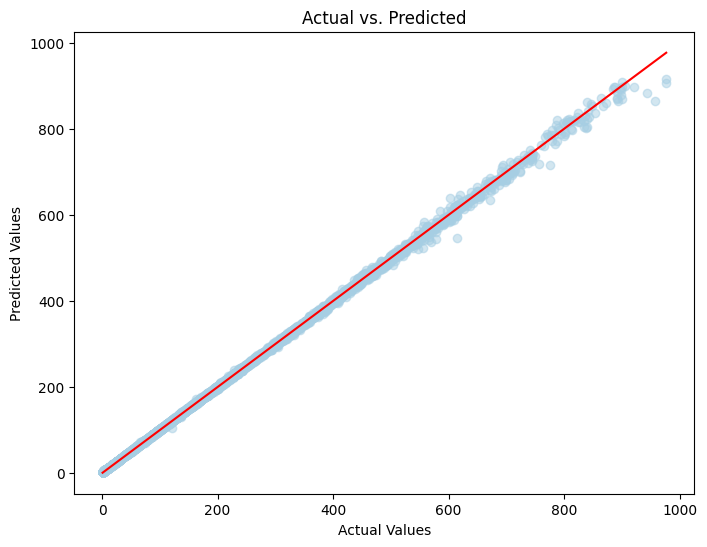

In [202]:
def plot_actual_vs_predicted(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red')  # Diagonal line
    plt.show()

plot_actual_vs_predicted(BSHy_test_g05,BSHy_pred_g05)

In [203]:
print(regression_metrics(BSHy_test_g05,BSHy_pred_g05))

{'MAE': 2.093392679688571, 'MSE': 19.527171778412235, 'RMSE': 4.418955960225474, 'R^2': 0.9994259442979533}


The near-perfect alignment of our data points with the 45-degree line on a scatter plot of actual versus predicted values is indicative of our model's predictive prowess. The strong R^2 value reinforces this, indicating that our model not only predicts well but also captures the essence of the data's variability effectively.

### Repeat the same with a different parameter set and compare the result with (2)


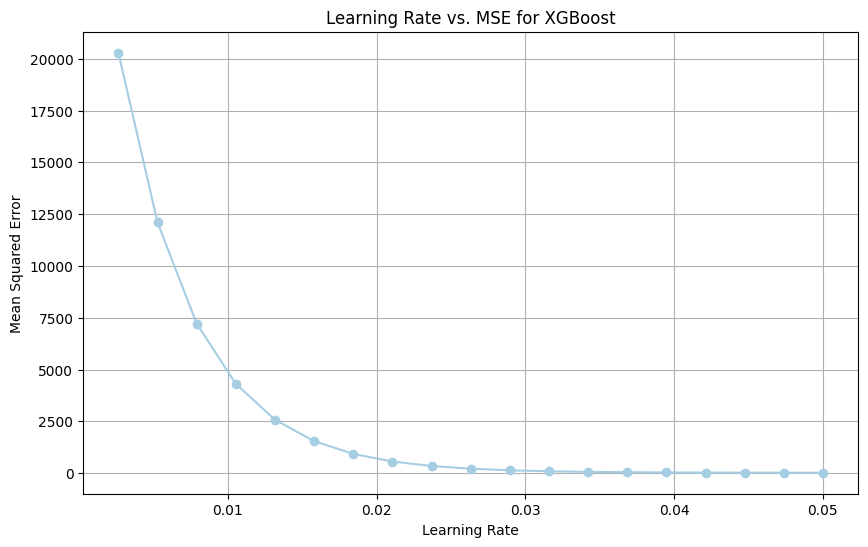

In [204]:
mse_values = []

# Train models for each learning rate and collect MSE
for lr in learning_rates:
    model = xgb.XGBRegressor(learning_rate=lr, objective ='reg:squarederror')  # Using squared error as the objective
    model.fit(BSHX_train_g05, BSHy_train_g05)
    y_pred = model.predict(BSHX_test_g05)
    mse = mean_squared_error(BSHy_test_g05, y_pred)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(learning_rates, mse_values, marker='o', linestyle='-')
plt.title('Learning Rate vs. MSE for XGBoost')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

plotted the learning rate from 0 to 0.05 and observed that as the learning rate increases within this range, the Mean Squared Error (MSE) decreases

Within the learning rate range of 0 to 0.05 for our XGBoost model, there's a clear trend where the MSE consistently decreases as the learning rate rises. This indicates that, at least within this range, a higher learning rate is beneficial for our model. 

## Bagging

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

In [205]:
from sklearn.ensemble import BaggingRegressor


Improt the bagging regressor from sklearn

### Create the appropriate regressor and describe what the syntax represents and what parameters you choose (1.5)

In [206]:
n_estimators = 100  # Number of base estimators in the ensemble
bagging_model = BaggingRegressor(n_estimators=n_estimators)


Im initialized a Bagging Regressor with 100 base estimators

### Train classifier on train data and explain what you did. (1.5) 

In [207]:
bagging_model.fit(BSHX_train_g05, BSHy_train_g05)

BaggingRegressor(n_estimators=100)

By training the bagging regressor on the BSHX_train_g05 and BSHy_train_g05 datasets, we're teaching it to understand the patterns in the bike sharing data. This trained model can then predict the number of bike rentals

### Test/fit classifier test data and explain what you did. (1.5)

In [208]:
# Predict on the test set
BSHy_pred_g05 = bagging_model.predict(BSHX_test_g05)



predicted the number of bkie rentals based on the test data

### Calculate accuracy and explain what you did. (1.5)

In [209]:
# Compute MSE
mse = mean_squared_error(BSHy_test_g05, BSHy_pred_g05)
mae = mean_absolute_error(BSHy_test_g05, BSHy_pred_g05)
r2 = r2_score(BSHy_test_g05, BSHy_pred_g05)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 10.240584215573456
Mean Absolute Error (MAE): 1.0172477943996932
R^2 Score: 0.9996989494521814


I calcuated the MSE, MAE and R^2 and those stats can tell us how good our model is. R^2 score is approximately 0.9994, which is very close to 1. This indicates that the model explains 99.94% of the variance in the target variable. Such a high R^2 score typically suggests an excellent fit to the data

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


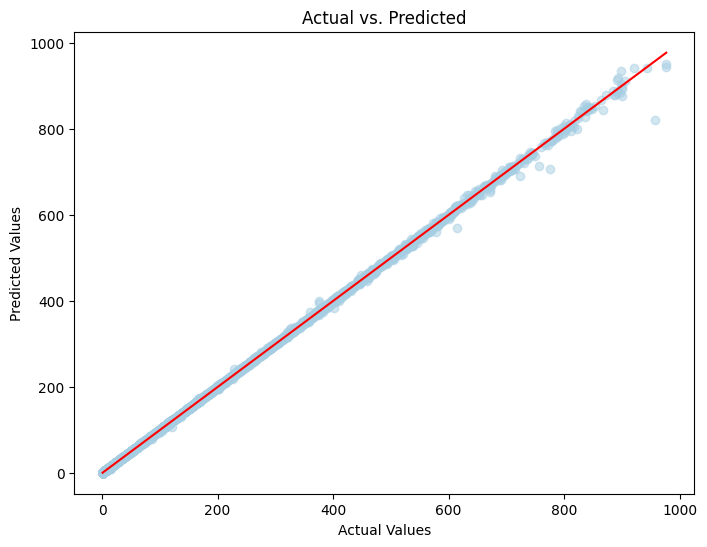

In [210]:
plot_actual_vs_predicted(BSHy_test_g05,BSHy_pred_g05)

In [211]:
print(regression_metrics(BSHy_test_g05,BSHy_pred_g05))

{'MAE': 1.0172477943996932, 'MSE': 10.240584215573456, 'RMSE': 3.2000912823814036, 'R^2': 0.9996989494521814}


When plotting our actual against predicted values, we observe a close alignment with a 45-degree angle, which is a hallmark of precise predictions. Our model's high R^2 value further attests to its ability to capture the inherent variability of the data. This combination of visual and quantitative metrics highlights the model's efficacy in making accurate forecasts.

### Repeat the same with a different parameter set and compare the result with (2)


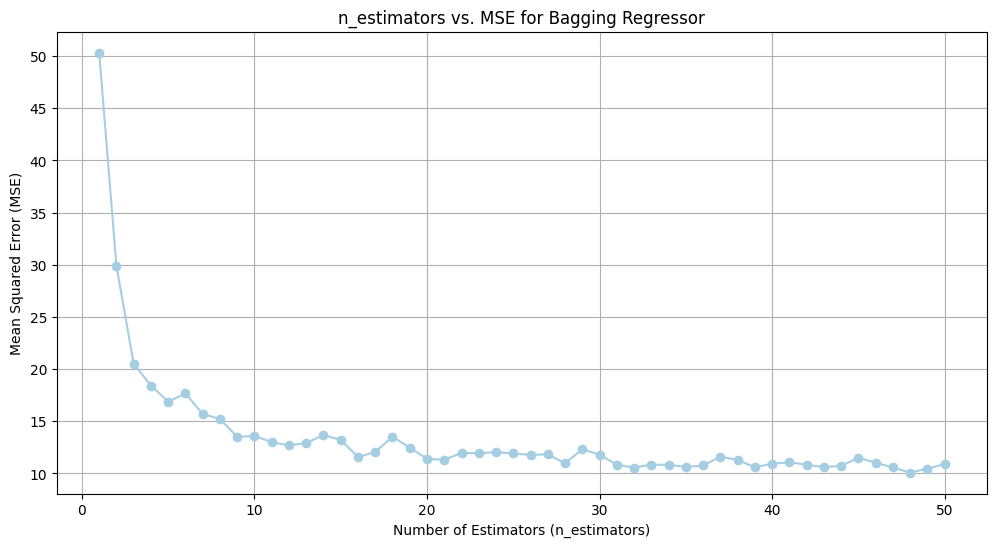

In [212]:
estimators_range = range(1, 51)  # We'll try from 1 to 100 estimators
mse_values = []

# Train models with different n_estimators and collect MSEs
for n in estimators_range:
    model = BaggingRegressor(n_estimators=n)
    model.fit(BSHX_train_g05, BSHy_train_g05)
    y_pred = model.predict(BSHX_test_g05)
    mse = mean_squared_error(BSHy_test_g05, y_pred)
    mse_values.append(mse)

# Plot n_estimators vs. MSE
plt.figure(figsize=(12, 6))
plt.plot(estimators_range, mse_values, marker='o', linestyle='-')
plt.title('n_estimators vs. MSE for Bagging Regressor')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

In examining the performance of our Bagging Regressor across different numbers of base estimators, we observe a clear trend: the MSE tends to decrease as the number of estimators increases, within the range of 0 to 50. 

# Bonus Question (5)
For all the given classifiers (Q3), evaluate the different parameter sets including (njobs, learning rate, etc).

## For boosting and bagging compare the tradeoff between njobs and learning rate. Plot the graph of different learning rates vs number of jobs(label the plot correctly. It should show title, x and y tik labels, and x and y axis labels). (1)

## Explain the graph in details, specifically describe the trade off between thelearning rate and n jobs. Also comment on the eolution of error for each combination(1 paragraph at least, 1.5).

## For bagging compare the tradeoff between the bootstrap features and max samples. Plot the graph of different combination of bootstrap features and max samples (label the plot correctly. It should show title, x and y tik labels, and x and y axis labels). (1)

## Explain the graph in details, specifically describe the trade off between bootstrap features and max samples (1 paragraph at least, 1.5) 